# Regression


In the following notebook I will apply two different regression models in order to model the dataset 'Boston house prices':

* Ridge regression
* K-nearest-neighbor regression

The dataset is available in sklearn.datasets and exists of 13 numeric/categorical feature variables and one numeric target variable. More information you can find below.

We will apply cross validation in order to choose the hyperparameters and compare the accuracy of the two models. We set cv=5, as the number of partitions. Additionaly, we call the mean over the 5 mean squared errors on the corresponding test sets, as the cross validation score.

We first load the data, sketch some informations about it and apply linear regression in order to get an overview of the regression problem.


In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Note, that CHAS and RAD are categorical variables. However, CHAS takes the values 0 or 1, and RAD is an index. This means, that both represent ordered sets and we can handle them like numeric data too.

We use linear regression from statsmodels.api and compute the mean squared error.

In [36]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

linreg=sm.OLS(boston.target,X)
beta2=linreg.fit().params
mse2=mean_squared_error(np.dot(X,beta2.T),boston.target)

print('The mean squared error is %.2f.' %(mse2))
print(linreg.fit().summary())



The mean squared error is 21.89.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 11 Dec 2019   Prob (F-statistic):          6.72e-135
Time:                        14:43:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.45

### Ridge regression (RR)

We apply cross validation in order to select the most accurate regularization parameter of ridge regression.

The minimal cross validation score is 29.75, where alpha=150.00.


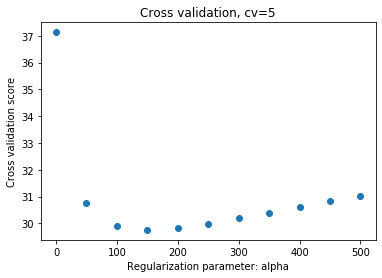

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

result_acc=np.array([])
alpha = np.array([])
for i in np.linspace(0,500,11):
    ridgereg=linear_model.Ridge(alpha=i)
    accuracy=np.mean(cross_val_score(ridgereg, boston.data, boston.target, cv=5, scoring='neg_mean_squared_error')*(-1))
    result_acc=np.append(result_acc,accuracy)
    alpha=np.append(alpha, i)
                          
print('The minimal cross validation score is %.2f, where alpha=%.2f.' %(np.min(result_acc),alpha[np.where(result_acc==np.min(result_acc))]))        
        
plt.plot(alpha,result_acc, 'o')
plt.xlabel('Regularization parameter: alpha')
plt.ylabel('Cross validation score')
plt.title('Cross validation, cv=5')
plt.show()

We now use ridge regression with regularization parameter alpha=150 and compute the mean squared error.

In [5]:
ridgereg2=linear_model.Ridge(alpha=150)
ridgereg2.fit(boston.data,boston.target)

Ridge(alpha=150, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
beta_1=ridgereg2.coef_
beta_0=ridgereg2.intercept_
beta=np.hstack((beta_0, beta_1))
os=np.ones((506,1))
X=np.hstack((os,boston.data))
mse=np.sum(np.power((np.dot(X,beta.T)-boston.target),2))/506
print('The mean squared error (ridge regression, alpha = 150) is %.2f.' %(mse))

The mean squared error (ridge regression, alpha = 150) is 24.29.


###  K-nearest neighbor regression (KNN)

We first apply K-nearest neighbor regression and use cross validation again to choose K (the number of neighbors). Further on, we display the minimal cross validation score.

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

accknn_old=1000.0
k=1

for i in np.linspace(1,200,21).astype(int):
    knn=KNeighborsRegressor(n_neighbors=i)
    accknn=np.mean(cross_val_score(estimator=knn,X=boston.data,y=boston.target,scoring='neg_mean_squared_error',cv=5, error_score='raise')*(-1))
    if accknn < accknn_old:
        accknn_old = accknn
        k=i
        
print('If we choose K=%s, the cross validation score is minimal, namely %.2f.' %(k,accknn_old))

If we choose K=60, the cross validation score is minimal, namely 72.46.


Unfortunatly, the value is quite large. But this fact is not surprising. When choosing the nearest neighbors of an input, the algorithm uses the Minkowski metric. If the data is not scaled, the definition of a neighbor is not really accurate.

So we scale the data before.

In [51]:
from sklearn import preprocessing
X_scaled=preprocessing.scale(boston.data)

We now apply K-nearest neighbor regression with the transformed data X_scale and use cross validation to choose K (the number of neighbors).

The minimal cross validation score is 28.49, where k=10.00.


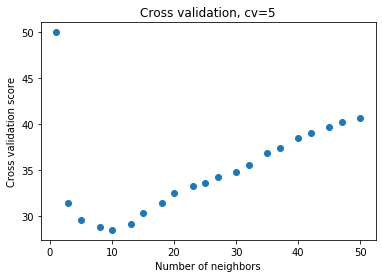

In [52]:
result_matrix=np.array([])
neighbor_matrix=np.array([])

for i in np.linspace(1,50,21).astype(int):
    knn_scaled=KNeighborsRegressor(n_neighbors=i)
    acc_knn_scaled=np.mean(cross_val_score(estimator=knn_scaled,X=X_scaled,y=boston.target,scoring='neg_mean_squared_error',cv=5)*(-1))
    result_matrix=np.append(result_matrix,acc_knn_scaled)
    neighbor_matrix=np.append(neighbor_matrix, i)
    
print('The minimal cross validation score is %.2f, where k=%.2f.' %(np.min(result_matrix),neighbor_matrix[np.where(result_matrix==np.min(result_matrix))]))        
            
                            
plt.plot(neighbor_matrix,result_matrix, 'o')
plt.xlabel('Number of neighbors')
plt.ylabel('Cross validation score')
plt.title('Cross validation, cv=5')
plt.show()



We now use the 10-nearest neighbors regression model on the shifted/scaled data and compute the mean squared error.

In [53]:
nn_scaled=KNeighborsRegressor(n_neighbors=10)
nn_scaled.fit(X_scaled, boston.target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [54]:
    mse=mean_squared_error(nn_scaled.predict(preprocessing.scale(boston.data)),boston.target)
    print('The mean square error is %.2f.' %(mse))

The mean square error is 17.53.


### Summary

The cross validation score for KNN (28.49) is slightly better than the cross validation score for RR (29.75). On the other hand the RR-model is better to interpret. If we compare the mean squared errors of both models, than KNN is substantially better. This results from a small bias of the KNN, but as we see from cross validation, the KNN's variance is relatively large.

In order to to get better results for RR, we could preprocess the data. One option is to carry out  feature selection (the t-values for x3 and x7 are very small), and/or scaling/shifting the data, as in KNN.